# **Wine Quality Prediction Using Support Vector Machine**

# **Objective**
To predict the quality of wine based on various chemical features using Support Vector Machine (SVM) model.

# **Data Source**
White Wine Quality Dataset by YBI Foundation.

# **Import Library**

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# **Import CSV as DataFrame**

In [6]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/WhiteWineQuality.csv',sep=';')


# **Describe Data**

In [32]:
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [34]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## **Data Visualization**

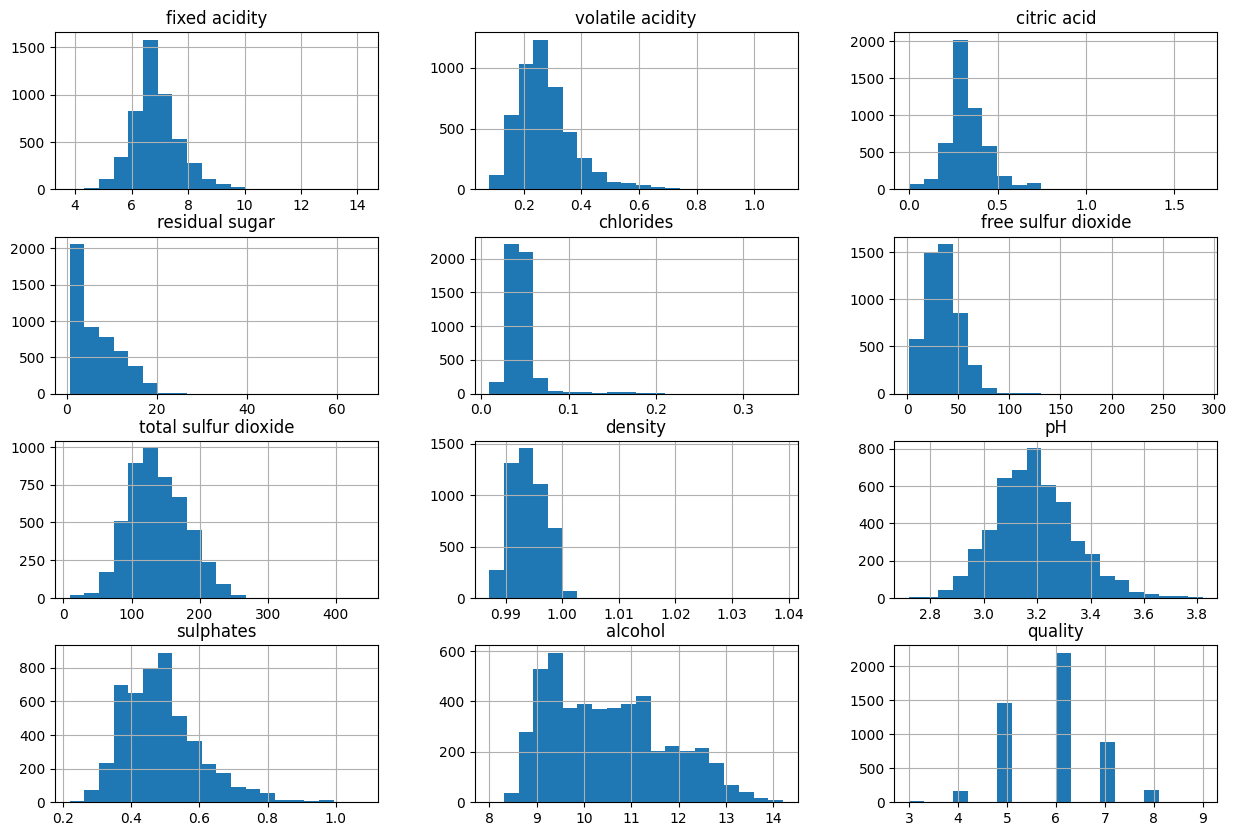

In [31]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

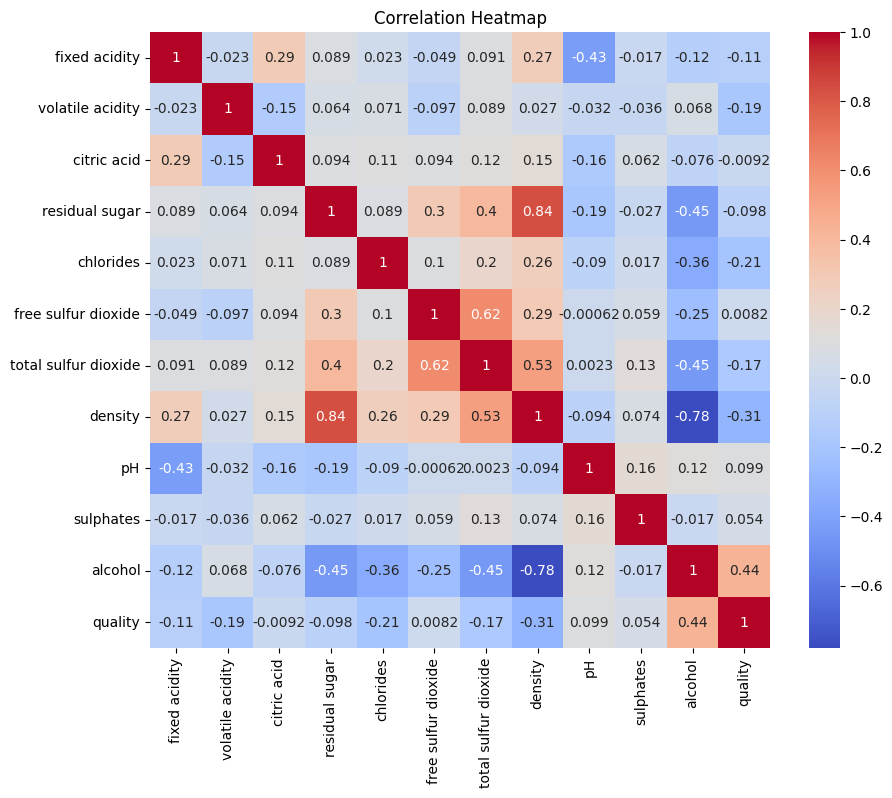

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Data Preprocessig**

1.Define target variable (y) and features (X)


In [35]:
y = df['quality']
X = df.drop(['quality'], axis=1)

2.Standardize the features

In [36]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Define Target Variable (y) and Feature Variables (X)**


In [22]:
# 1: Good, 0: Bad
y = df['quality'].apply(lambda y_value: 1 if y_value >= 6 else 0)

In [23]:
y.value_counts()

,count
quality,
1,3258
0,1640


# **Train Test Split**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=182529)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

# **Modeling**


In [27]:
svc = SVC()
svc.fit(X_train, y_train)


SVC()

# **Model Evaluation**


1.Predict on test data


In [37]:
y_pred = svc.predict(X_test)

2.Evaluate the model using confusion matrix and classification report


In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[310 182]
 [127 851]]
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       492
           1       0.82      0.87      0.85       978

    accuracy                           0.79      1470
   macro avg       0.77      0.75      0.76      1470
weighted avg       0.79      0.79      0.79      1470



# **Prediction**


In [39]:
df_new = df.sample(1)
X_new = df_new.drop(['quality'], axis=1)
X_new = scaler.transform(X_new)
y_pred_new = svc.predict(X_new)
y_pred_new


array([0])

# **Explanation**
1. The project predicts wine quality based on various chemical properties using a Support Vector Machine (SVM) model.  
2. The dataset is cleaned and standardized, ensuring that the features (chemical properties) are on a similar scale.  
3. The target variable ( y ) is defined as wine quality, categorized into 'good' (quality ≥ 6) and 'bad' (quality < 6).  
4. The model is trained using a subset of the data, splitting it into training and testing sets for validation.  
5. A confusion matrix is used to evaluate the model's performance.  
6. A classification report provides detailed metrics (precision, recall, F1-score) to assess the model's accuracy.  
7. The model is used to predict the quality of new wine samples based on their chemical properties.  
8. Histograms and correlation heatmaps are created to understand feature distribution and relationships, aiding in further data insights.  
9. The model classifies wine as 'good' or 'bad' based on a threshold quality score, measuring its effectiveness in differentiating the two categories.